
### Informações de fechamento do Renda Variável .



### **Módulos Necessários**

In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk



### Utilizando Yahoo Finance

In [24]:
ativos = ["ALUP11.SA","BBAS3.SA"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
            ALUP11.SA   BBAS3.SA  ALUP11.SA   BBAS3.SA  ALUP11.SA   BBAS3.SA   
Date                                                                           
2022-07-13  24.042028  30.216646  25.451923  32.650002  26.192307  33.090000   
2022-07-14  24.114691  30.179625  25.528847  32.610001  25.625000  32.689999   
2022-07-15  24.296345  30.799686  25.721153  33.279999  25.721153  33.610001   
2022-07-18  24.078358  31.234655  25.490383  33.750000  26.096153  34.070000   
2022-07-19  24.441668  32.076839  25.875000  34.660000  25.903847  34.700001   
...               ...        ...        ...        ...        ...        ...   
2023-07-07  29.450001  49.959999  29.450001  49.959999  29.879999  50.320000   
2023-07-10  29.330000  49.040001  29.330000  49.040001  29.459999  50.049999   
2023-07-11  28.840000  48.340000  28.840000  48.340000  29.330000  49.020000   
2023-07-12  28.780001  47.560001  28.780001  47.560001  29.110001  48.939999   
2023-07-13  28.770000  48.250000  28.770000  48.250000  29.070000  48.380001   

                  Low                  Open               Volume            
            ALUP11.SA   BBAS3.SA  ALUP11.SA   BBAS3.SA ALUP11.SA  BBAS3.SA  
Date                                                                        
2022-07-13  25.163462  32.509998  25.403847  32.799999   1380912  12673500  
2022-07-14  25.230768  31.920000  25.230768  32.500000   1180400  12284300  
2022-07-15  25.355768  32.220001  25.538462  32.599998    634504  12272800  
2022-07-18  25.355768  33.349998  25.807692  33.500000   2682056  10894600  
2022-07-19  25.490383  33.790001  25.692307  33.880001    600184  15414400  
...               ...        ...        ...        ...       ...       ...  
2023-07-07  29.400000  49.040001  29.650000  49.040001    498600  11539600  
2023-07-10  29.110001  48.790001  29.450001  49.990002    955300   8903000  
2023-07-11  28.450001  47.880001  29.330000  49.000000    853600  12336800  
2023-07-12  28.670000  47.360001  28.900000  48.939999    691400  12229100  
2023-07-13  28.680000  47.590000  29.000000  47.860001    404300   4068100  

[251 rows x 12 columns]

### Manipulação dos Dados

In [25]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['Alupar','Banco do Brasil']
dados_fechamento

,Alupar,Banco do Brasil
Date,,
2022-07-13,24.042028,30.216646
2022-07-14,24.114691,30.179625
2022-07-15,24.296345,30.799686
2022-07-18,24.078358,31.234655
2022-07-19,24.441668,32.076839
...,...,...
2023-07-07,29.450001,49.959999
2023-07-10,29.330000,49.040001
2023-07-11,28.840000,48.340000


In [26]:
dados_fechamento_mensal = dados_fechamento.resample("M").last()#Mensal
dados_fechamento_anual = dados_fechamento.resample("Y").last()#Anual

dados_fechamento_anual

,Alupar,Banco do Brasil
Date,,
2022-12-31,25.758667,33.012726
2023-12-31,28.770000,48.250000


### Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos.

In [27]:
retorno_no_ano = dados_fechamento_anual.pct_change()#.dropna()
retorno_no_mes = dados_fechamento_mensal.pct_change()#.dropna()
retorno_no_dia = dados_fechamento.pct_change().dropna()

retorno_no_dia

,Alupar,Banco do Brasil
Date,,
2022-07-14,0.003022,-0.001225
2022-07-15,0.007533,0.020546
2022-07-18,-0.008972,0.014123
2022-07-19,0.015089,0.026963
2022-07-20,-0.005946,0.000289
...,...,...
2023-07-07,-0.001356,0.019384
2023-07-10,-0.004075,-0.018415
2023-07-11,-0.016706,-0.014274


### Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.¶

In [30]:
retorno_dia_Alupar = retorno_no_dia.iloc[-1, 0]
retorno_mes_Alupar = retorno_no_mes.iloc[-1, 0]
retorno_ano_Alupar = retorno_no_ano.iloc[-1, 0]

retorno_dia_Banco_Brasil = retorno_no_dia.iloc[-1, 0]
retorno_mes_Banco_Brasil = retorno_no_mes.iloc[-1, 0]
retorno_ano_Banco_Brasil = retorno_no_ano.iloc[-1, 0]

retorno_dia_Banco_Brasil

-0.0003474714608494578

In [31]:
retorno_ano_Alupar = round(retorno_ano_Alupar * 100,2)
retorno_ano_Banco_Brasil = round (retorno_ano_Banco_Brasil * 100,2)

retorno_mes_Alupar = round(retorno_dia_Alupar * 100, 2)
retorno_mes_Banco_Brasil = round(retorno_mes_Banco_Brasil * 100,2)

retorno_dia_Alupar = round(retorno_dia_Alupar * 100,2)
retorno_dia_Banco_Brasil = round(retorno_dia_Banco_Brasil * 100,2)

retorno_ano_Alupar

11.69

### Gráficos da performance do último dos ativos

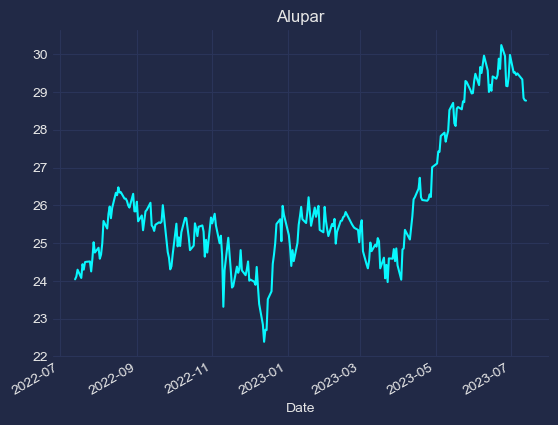

In [32]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Alupar', use_index = True, legend = False)

plt.title("Alupar")

plt.savefig('Alupar.png', dpi = 300)

plt.show()

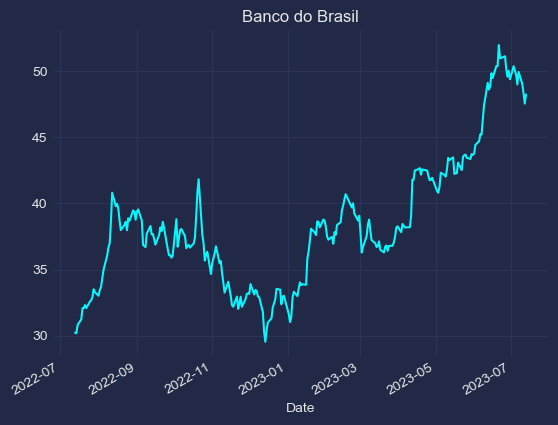

In [36]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = 'Banco do Brasil', use_index = True, legend = False)

plt.title("Banco do Brasil")

plt.savefig('Banco do Brasil.png', dpi = 300)

plt.show()